In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy.special import gamma
import seaborn as sns; sns.set()

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 32,
    'figure.figsize': (9,6)
})

### Let's generate some data

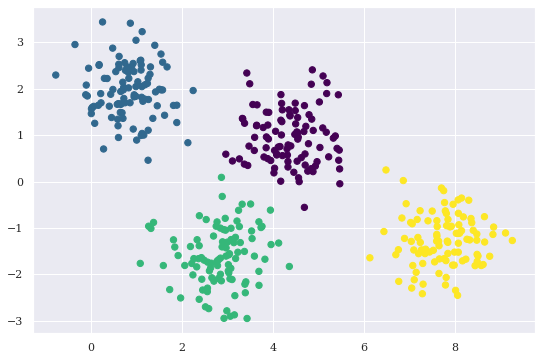

In [5]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], c=y_true, s = 40, cmap='viridis');

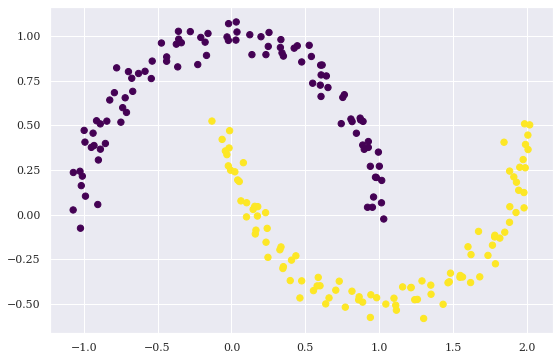

In [6]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=ymoon, s = 40, cmap='viridis');

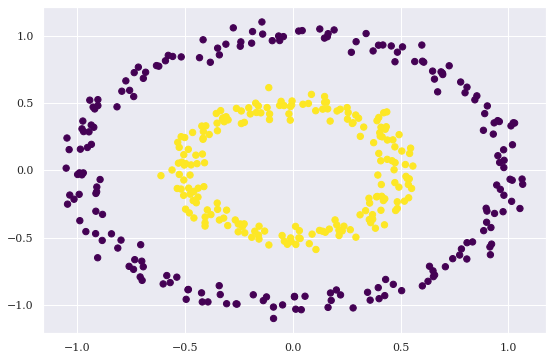

In [7]:
from sklearn import datasets
X_circles, y_circles = datasets.make_circles(n_samples=400, factor=.5,noise=.05)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s = 40, cmap='viridis');

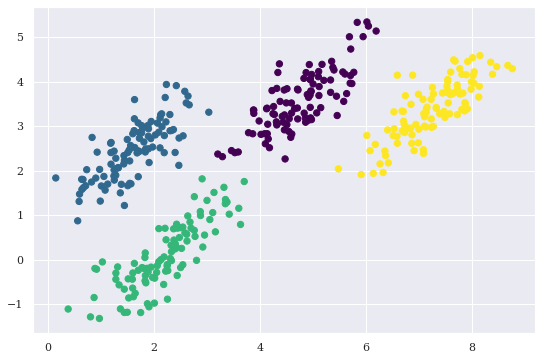

In [8]:
transformation = [[1, 0.6], [0.4, 1]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_true, s = 40, cmap='viridis');

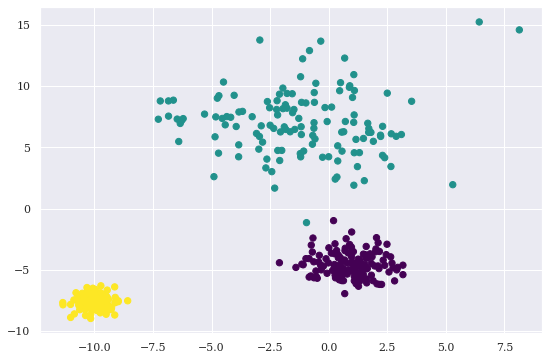

In [9]:
# blobs with varied variances
X_varied, y_varied = datasets.make_blobs(n_samples=400, cluster_std=[1.0, 2.5, 0.5],random_state=100)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, s = 40, cmap='viridis');

### Reading High Entropy Dataset

In [10]:
data = pd.read_csv("HEA-Table1_HW6.csv", sep = ",") 
display(data)

,Atomic Composition,Al,Co,Cr,Cu,Fe,Hf,Mo,Nb,B,...,ROM Density,Measured Density,Vickers Hardness,Type_of_Test,Type of Test,Yield Strength (MPa),Tensile Strength (MPa),Elongation (%),ROM Modulus,Measured Modulus
0,CoFeNi,NaN,33.33,NaN,NaN,33.33,NaN,NaN,NaN,NaN,...,8.5,NaN,125.0,1.0,C,204.0,NaN,NaN,207.0,NaN
1,CoFeNi,NaN,33.33,NaN,NaN,33.33,NaN,NaN,NaN,NaN,...,8.5,NaN,125.0,1.0,C,209.0,NaN,NaN,207.0,NaN
2,CoFeNi,NaN,33.33,NaN,NaN,33.33,NaN,NaN,NaN,NaN,...,8.5,NaN,NaN,2.0,T,211.0,513.0,31.0,207.0,NaN
3,CoFeNiSi0.25,NaN,30.77,NaN,NaN,30.77,NaN,NaN,NaN,NaN,...,7.7,NaN,149.0,1.0,C,196.0,NaN,NaN,194.0,NaN
4,CoFeNiSi0.5,NaN,28.57,NaN,NaN,28.57,NaN,NaN,NaN,NaN,...,7.1,NaN,287.0,1.0,C,476.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,CoFeMoNi1.8V,NaN,17.24,NaN,NaN,17.24,NaN,17.24,NaN,NaN,...,8.5,NaN,510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,CoFeMoNi2V,NaN,16.67,NaN,NaN,16.67,NaN,16.67,NaN,NaN,...,8.5,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,CoFeMoNiTiVZr,NaN,14.29,NaN,NaN,14.29,NaN,14.29,NaN,NaN,...,7.3,NaN,790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,CuFeNiTiVZr,NaN,NaN,NaN,16.67,16.67,NaN,NaN,NaN,NaN,...,6.8,NaN,590.0,NaN,NaN,NaN,NaN,NaN,142.0,NaN


### Principal Component Analysis

In [11]:
labels = data['Atomic Composition']
subdata = data.loc[:, 'Al':'Grosser']
subdata = subdata.fillna(0)
display(subdata)

,Al,Co,Cr,Cu,Fe,Hf,Mo,Nb,B,C,...,Ni,Si,V,Sc,Sn,W,Zr,Zn,Y,Grosser
0,0.0,33.33,0.0,0.00,33.33,0.0,0.00,0.0,0.0,0.0,...,33.33,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
1,0.0,33.33,0.0,0.00,33.33,0.0,0.00,0.0,0.0,0.0,...,33.33,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
2,0.0,33.33,0.0,0.00,33.33,0.0,0.00,0.0,0.0,0.0,...,33.33,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
3,0.0,30.77,0.0,0.00,30.77,0.0,0.00,0.0,0.0,0.0,...,30.77,7.69,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
4,0.0,28.57,0.0,0.00,28.57,0.0,0.00,0.0,0.0,0.0,...,28.57,14.29,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.0,17.24,0.0,0.00,17.24,0.0,17.24,0.0,0.0,0.0,...,31.03,0.00,17.24,0.0,0.0,0.0,0.00,0.0,0.0,5
351,0.0,16.67,0.0,0.00,16.67,0.0,16.67,0.0,0.0,0.0,...,33.33,0.00,16.67,0.0,0.0,0.0,0.00,0.0,0.0,5
352,0.0,14.29,0.0,0.00,14.29,0.0,14.29,0.0,0.0,0.0,...,14.29,0.00,14.29,0.0,0.0,0.0,14.29,0.0,0.0,5
353,0.0,0.00,0.0,16.67,16.67,0.0,0.00,0.0,0.0,0.0,...,16.67,0.00,16.67,0.0,0.0,0.0,16.67,0.0,0.0,5


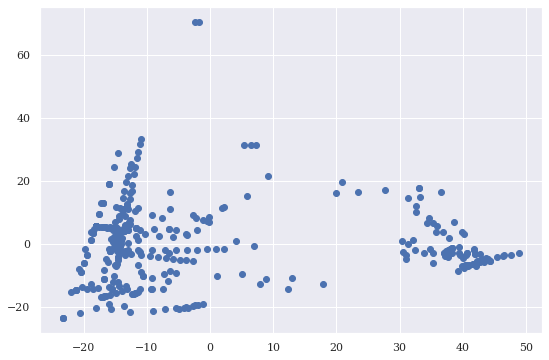

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(subdata)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2']);

In [13]:
pca = PCA(0.95)
pca.fit_transform(subdata)

(pca.explained_variance_ratio_)*100

array([45.29298508, 14.00574572,  6.85184445,  6.31516339,  4.62407104,
        3.74903704,  3.6041863 ,  3.1956269 ,  2.74832587,  2.47648124,
        1.73258175,  1.37230918])

## Clustering

### Hierarchical Clustering

- On gaussian mixtures

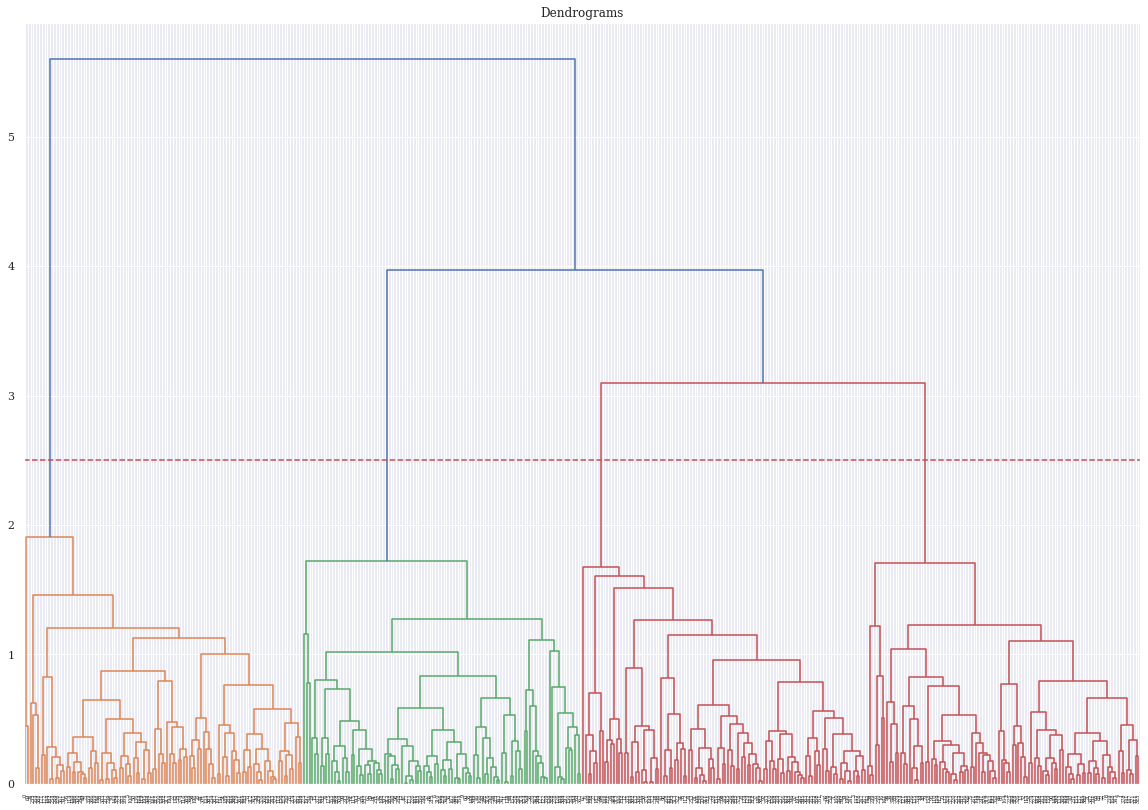

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 14))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.axhline(y=2.5, color='r', linestyle='--');

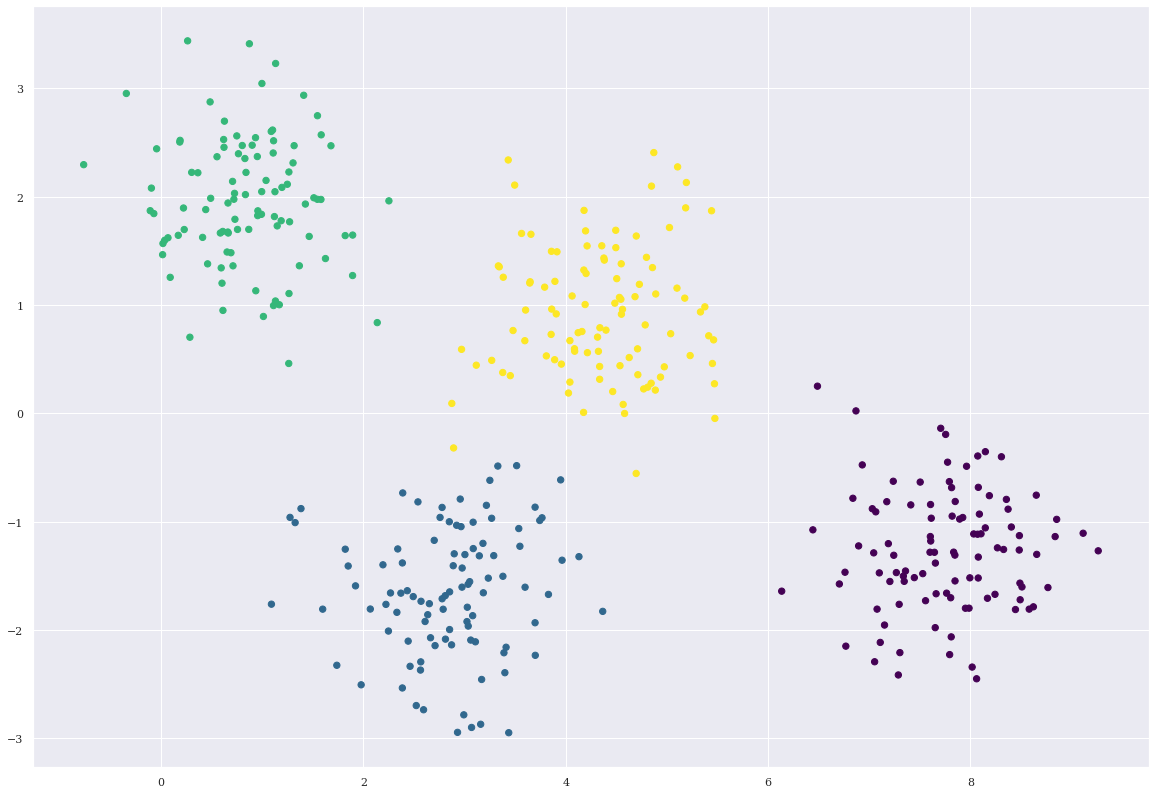

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average') 
cluster.fit_predict(X)
plt.figure(figsize=(20, 14))  
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, s = 40, cmap='viridis');

- On Moon Shape

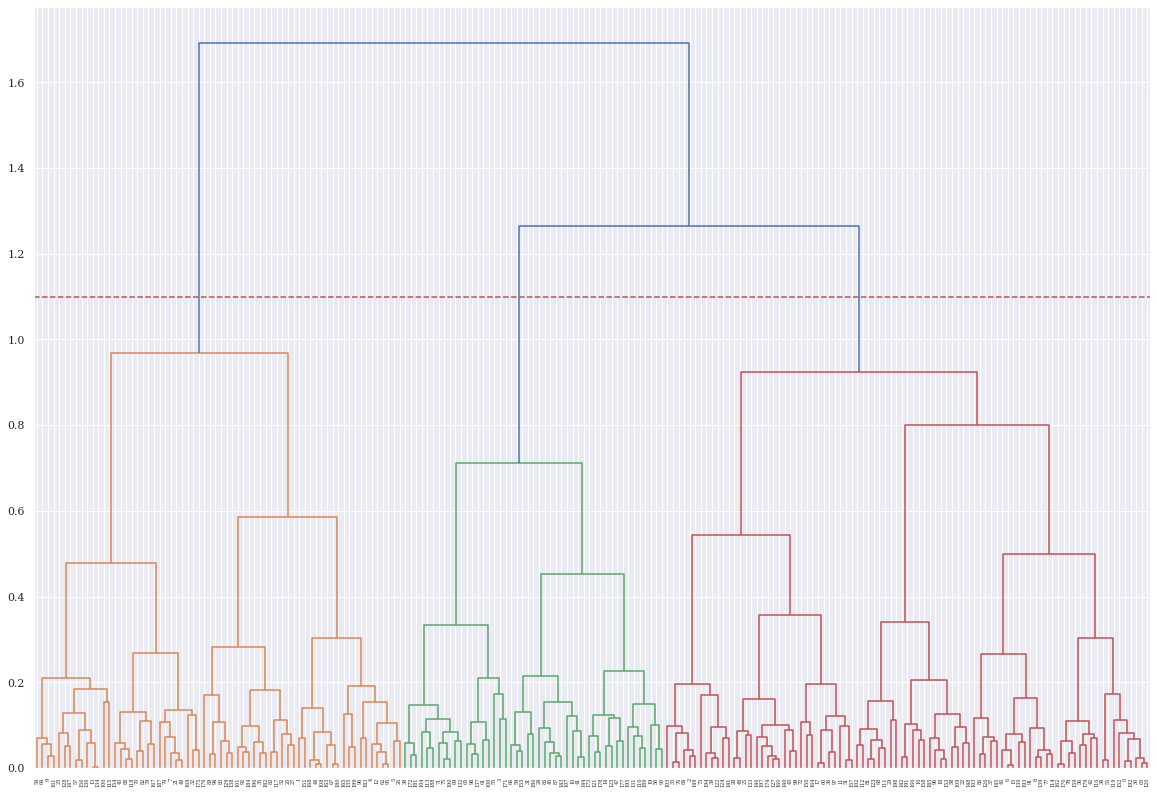

In [16]:
plt.figure(figsize=(20, 14))    
dend = shc.dendrogram(shc.linkage(Xmoon, method='average'))
plt.axhline(y=1.1, color='r', linestyle='--');

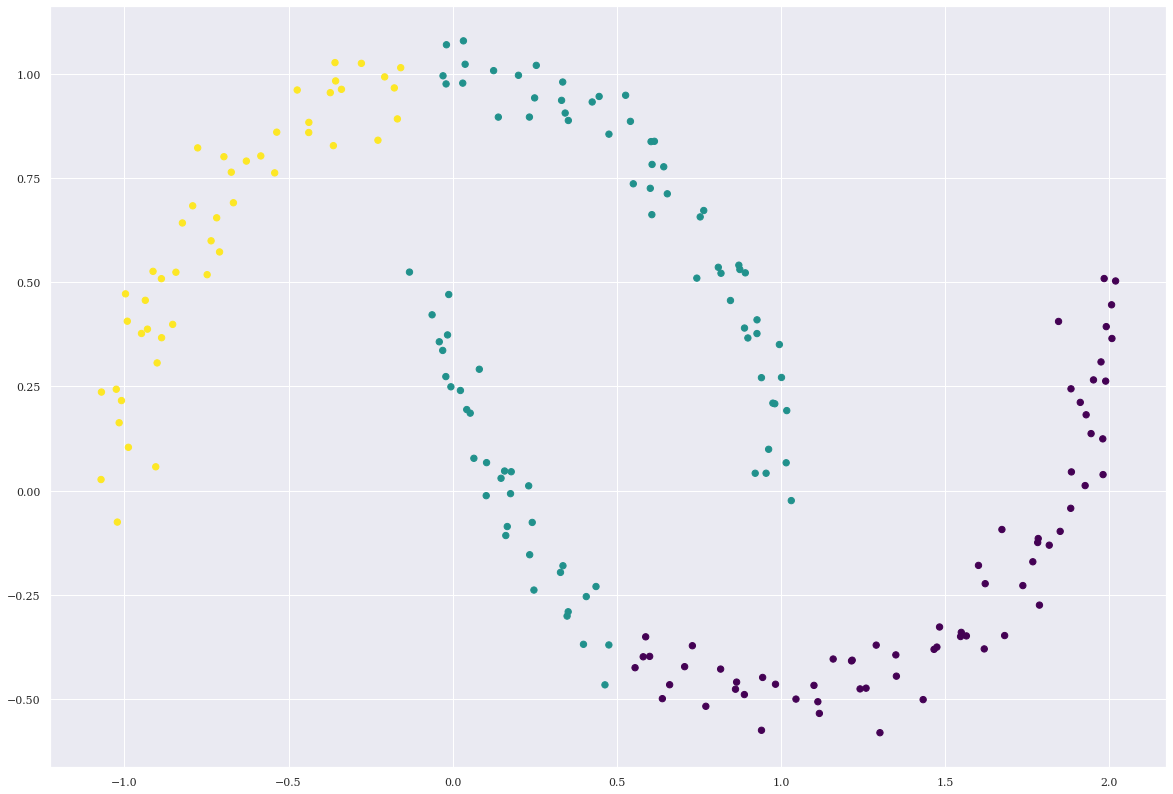

In [17]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
cluster.fit_predict(Xmoon)
plt.figure(figsize=(20, 14))  
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=cluster.labels_, s = 40, cmap='viridis');

- On HEA Principal Components

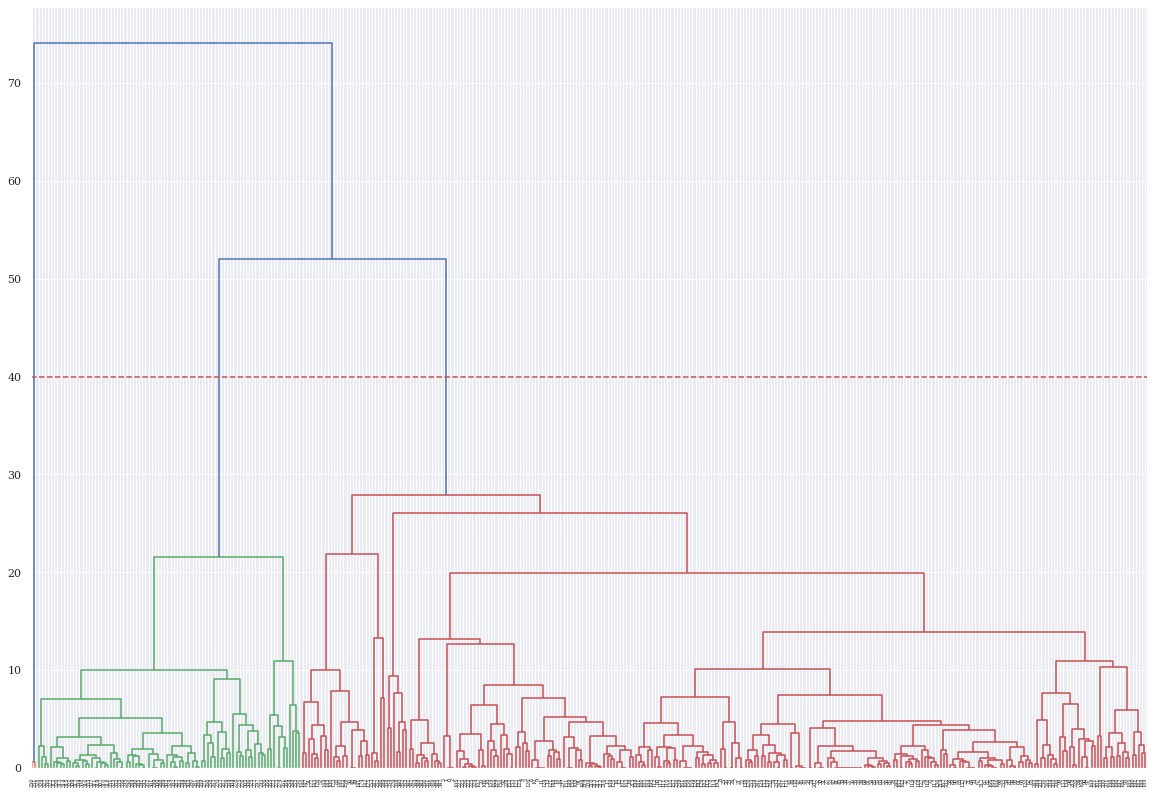

In [18]:
plt.figure(figsize=(20, 14))  
dend = shc.dendrogram(shc.linkage(principalDf, method='average'))
plt.axhline(y=40, color='r', linestyle='--');

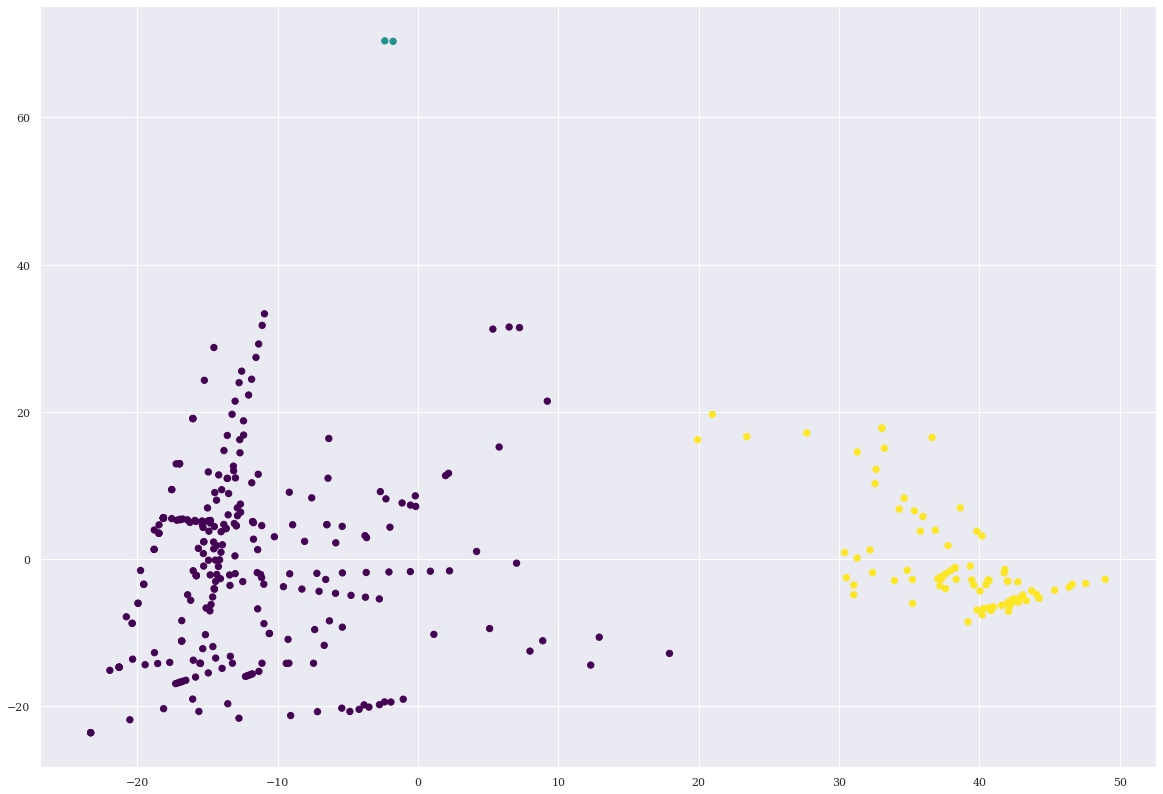

In [19]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
cluster.fit_predict(principalDf)
plt.figure(figsize=(20, 14))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=cluster.labels_, s = 40, cmap='viridis');

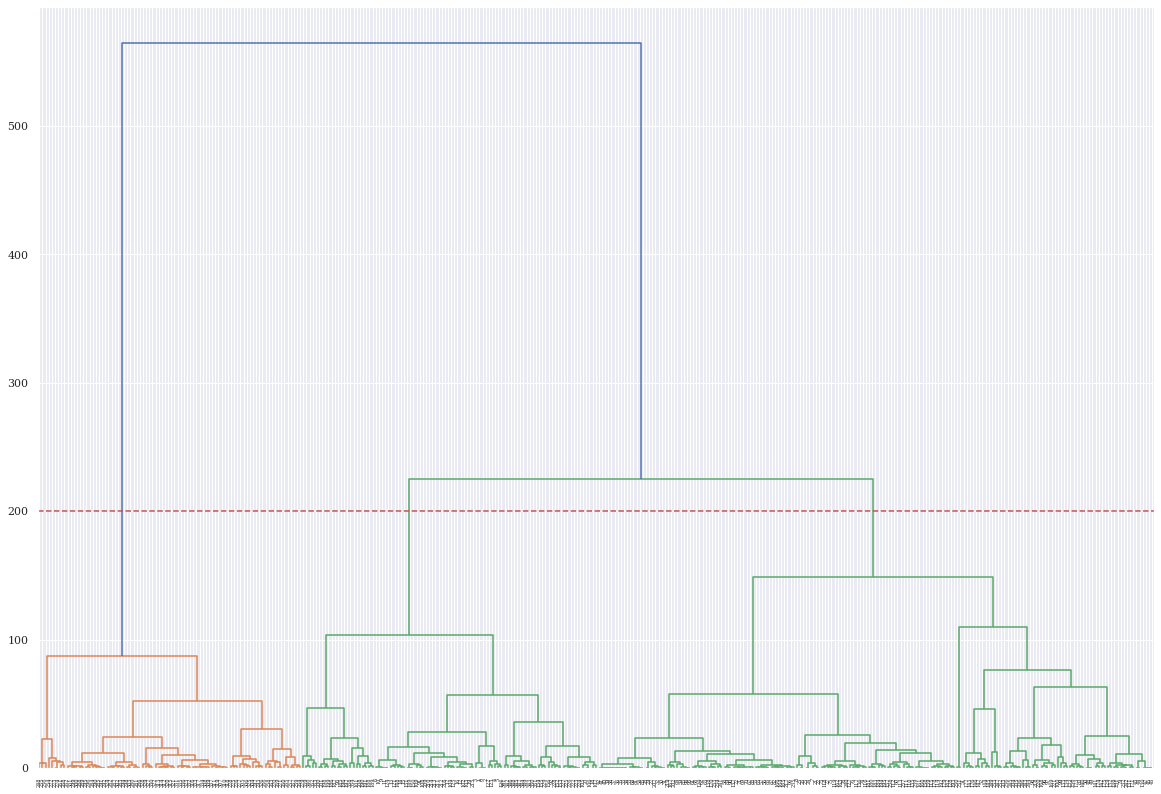

In [20]:
plt.figure(figsize=(20, 14))  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))
plt.axhline(y=200, color='r', linestyle='--');

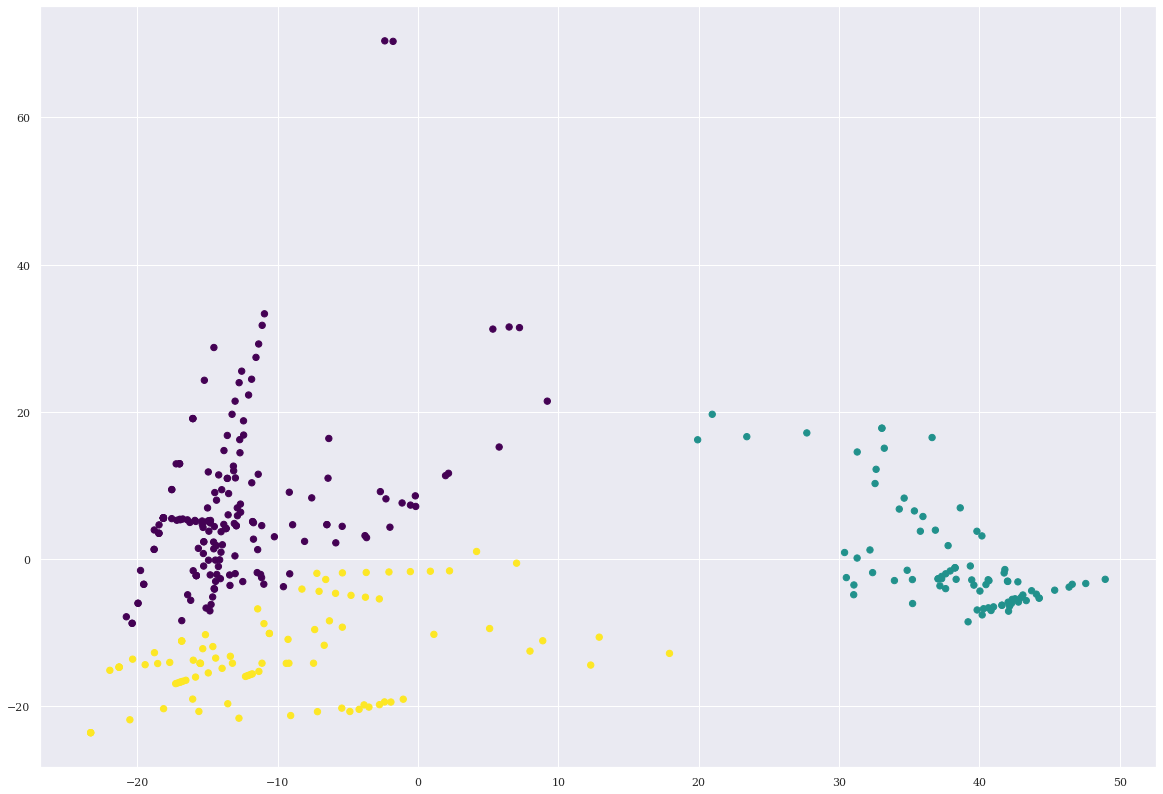

In [21]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
cluster.fit_predict(principalDf)
plt.figure(figsize=(20, 14))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=cluster.labels_, s = 40, cmap='viridis');

- Ward : minimizes the total within-cluster variance
- At each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging
- This increase is a weighted squared distance between the cluster centers

### K-Means

- On gaussian mixtures

C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


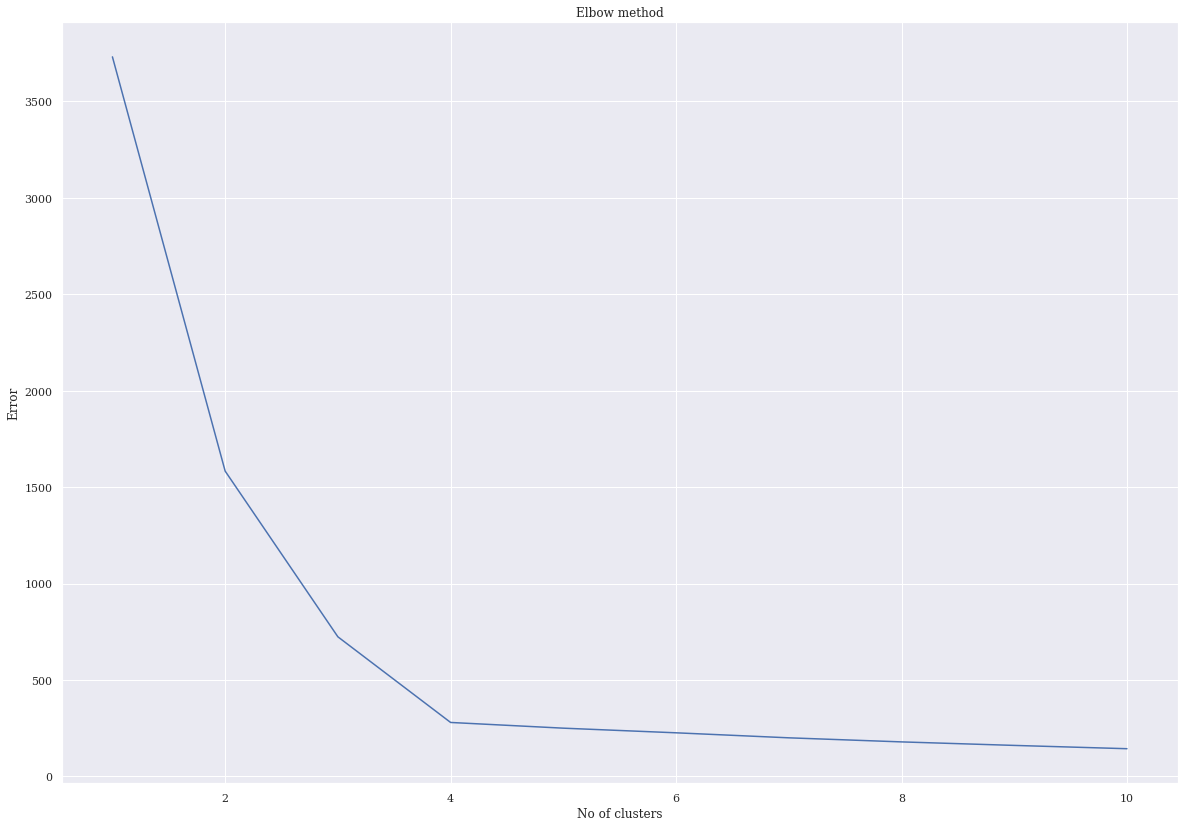

In [45]:
from sklearn.cluster import KMeans

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.figure(figsize=(20, 14))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

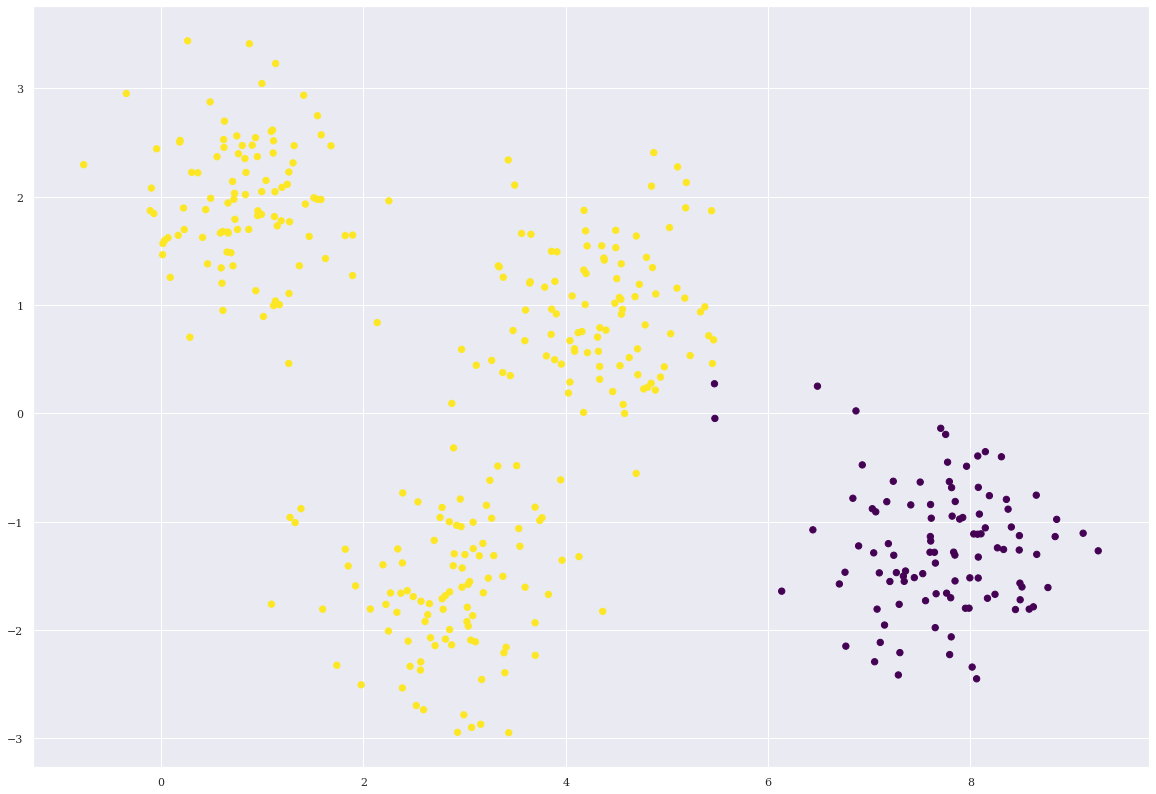

In [53]:
# Number of clusters
kmeans = KMeans(n_clusters=2)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 14))  
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 40, cmap='viridis');

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=kmeans.target_names,
            yticklabels=kmeans.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

TypeError: Expected sequence or array-like, got <class 'sklearn.cluster._kmeans.KMeans'>

- On Moon Shape

C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


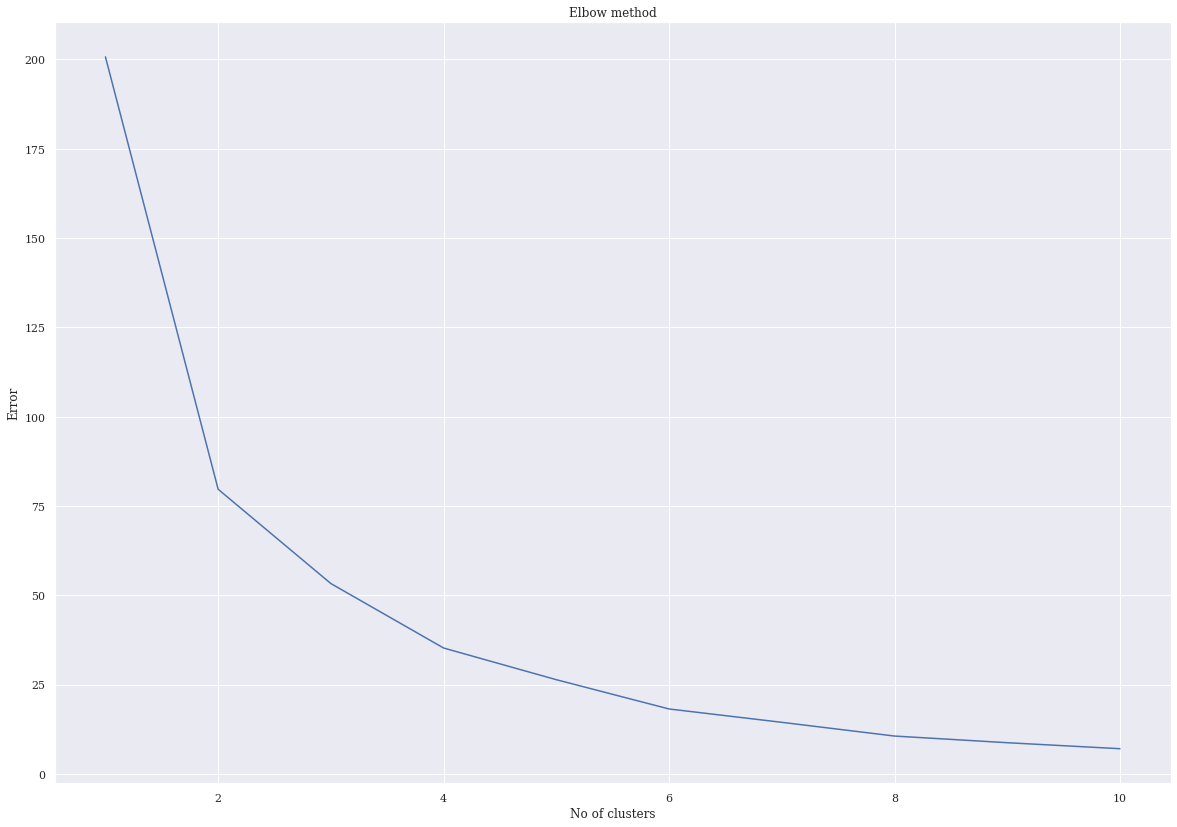

In [24]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(Xmoon)
    kmeans.fit(Xmoon)
    Error.append(kmeans.inertia_)

plt.figure(figsize=(20, 14))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

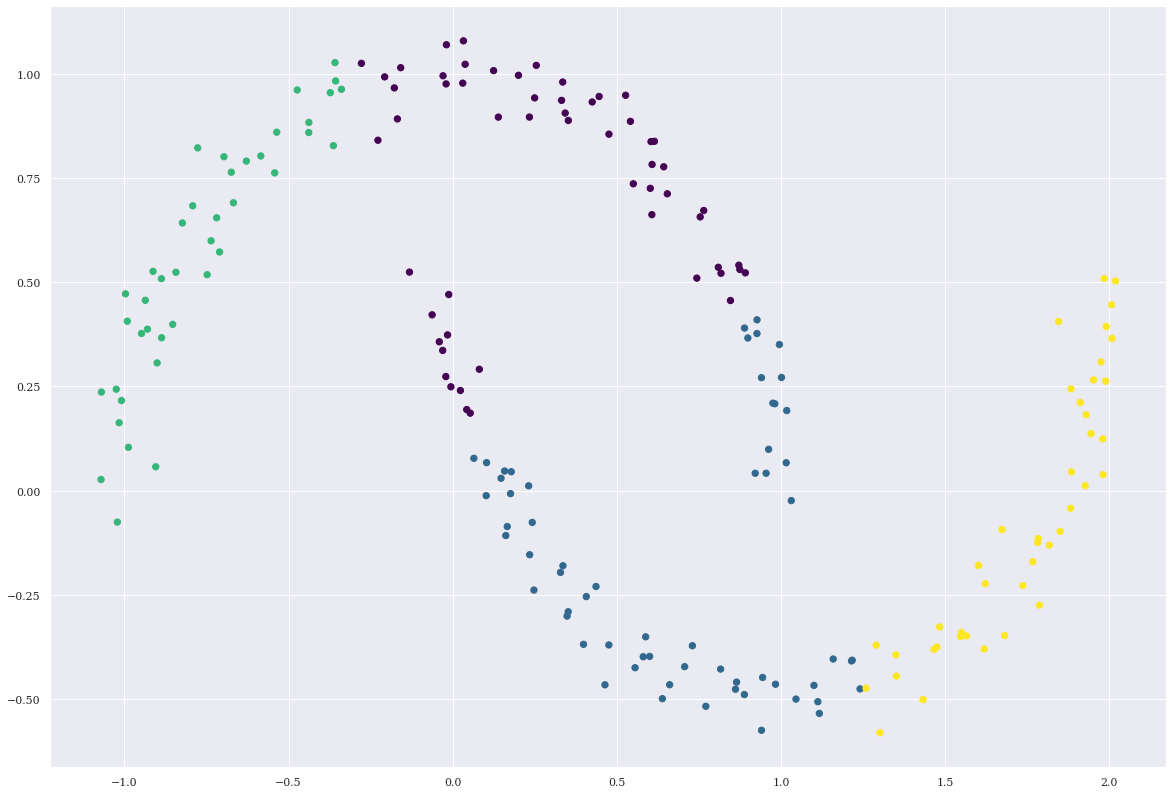

In [25]:
# Number of clusters
kmeans = KMeans(n_clusters=4)

# Fitting the input data
kmeans = kmeans.fit(Xmoon)

# Getting the cluster labels
labels = kmeans.predict(Xmoon)

# Centroid values
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 14))  
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=labels, s = 40, cmap='viridis');

- On HEA Principal Components

C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\19176\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


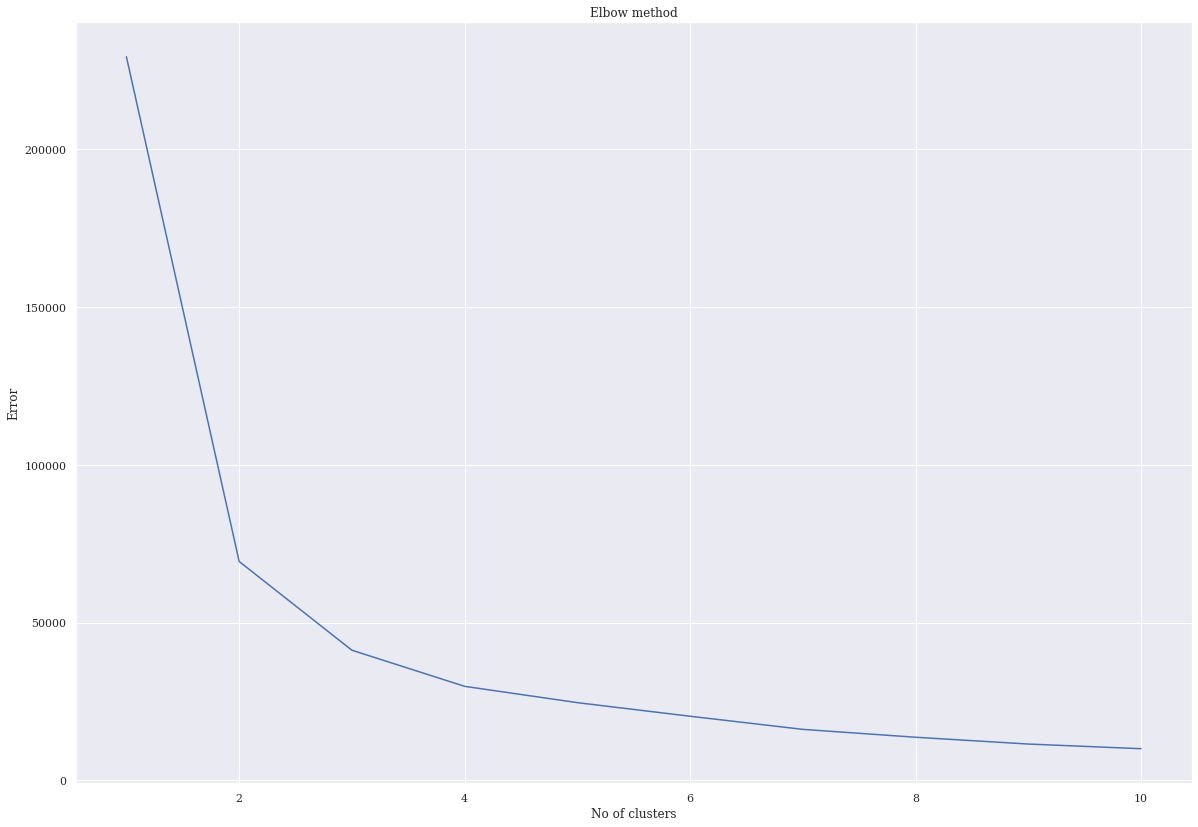

In [26]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(principalDf)
    kmeans.fit(principalDf)
    Error.append(kmeans.inertia_)

plt.figure(figsize=(20, 14))
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

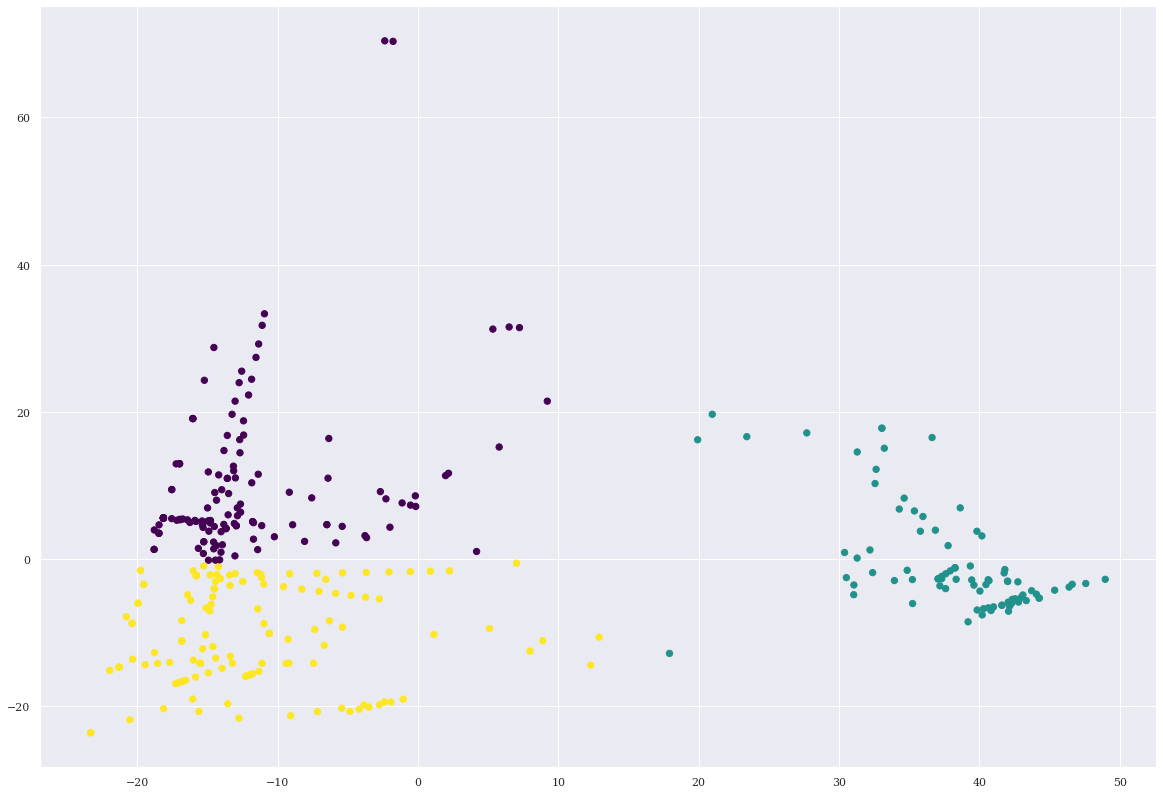

In [27]:
# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(principalDf)

# Getting the cluster labels
labels = kmeans.predict(principalDf)

# Centroid values
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 14))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, s = 40, cmap='viridis');

### DBSCAN

- On Gaussian Mixtures 

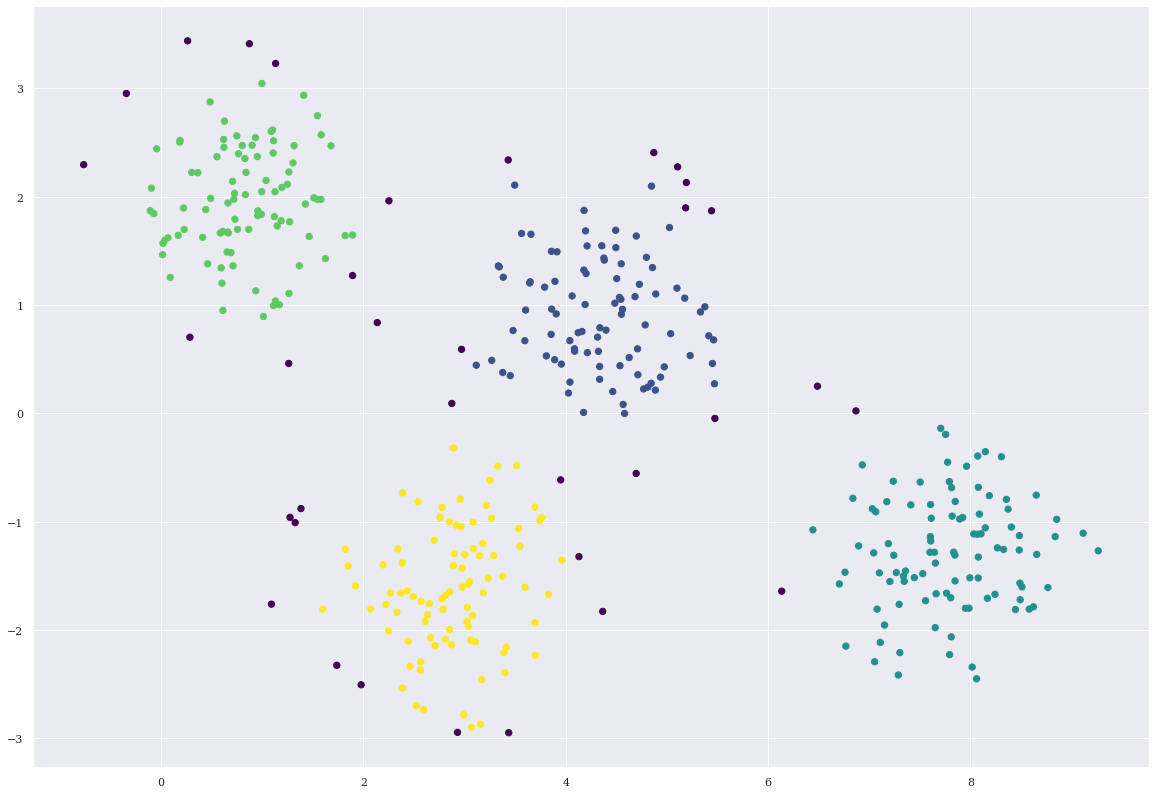

In [28]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.5, min_samples = 10).fit(X) 
labels = db_default.labels_ 

plt.figure(figsize=(20, 14))  
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 40, cmap='viridis');

- On Moon Shape

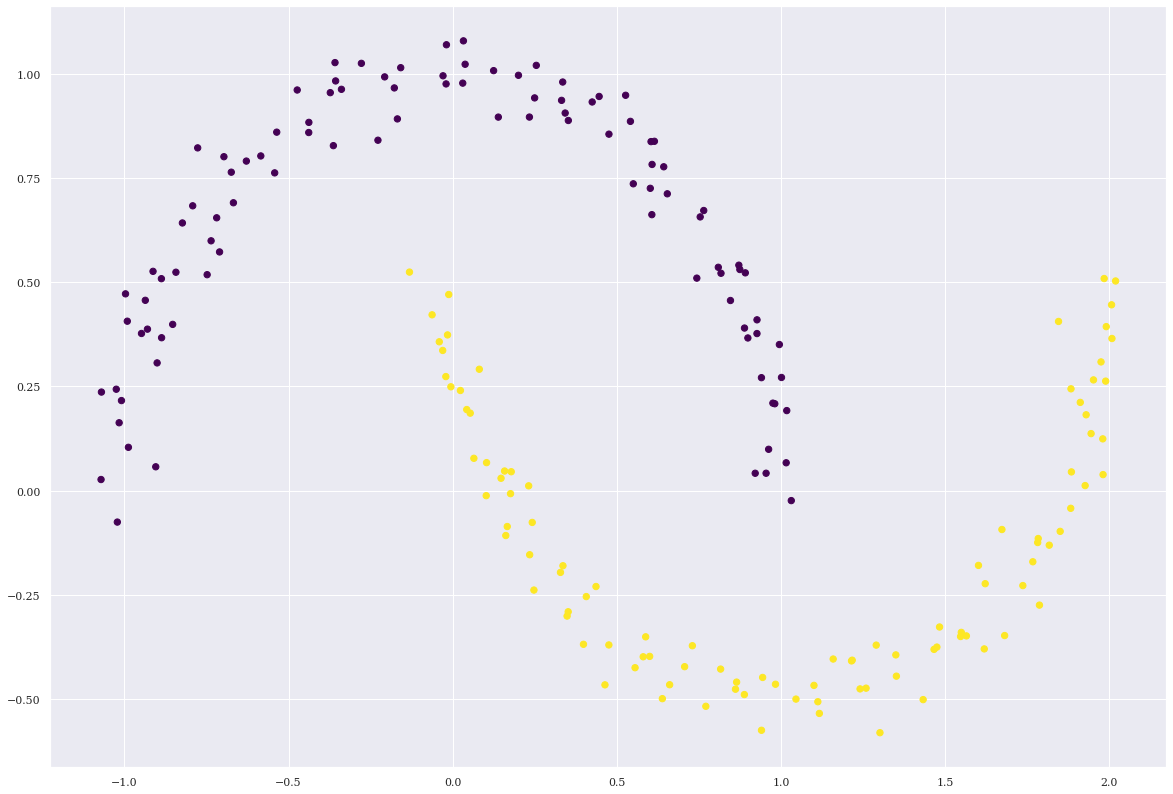

In [29]:
db_default = DBSCAN(eps = 0.25, min_samples = 10).fit(Xmoon) 
labels = db_default.labels_ 

plt.figure(figsize=(20, 14))  
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=labels, s = 40, cmap='viridis');

- On HEA Principal Components

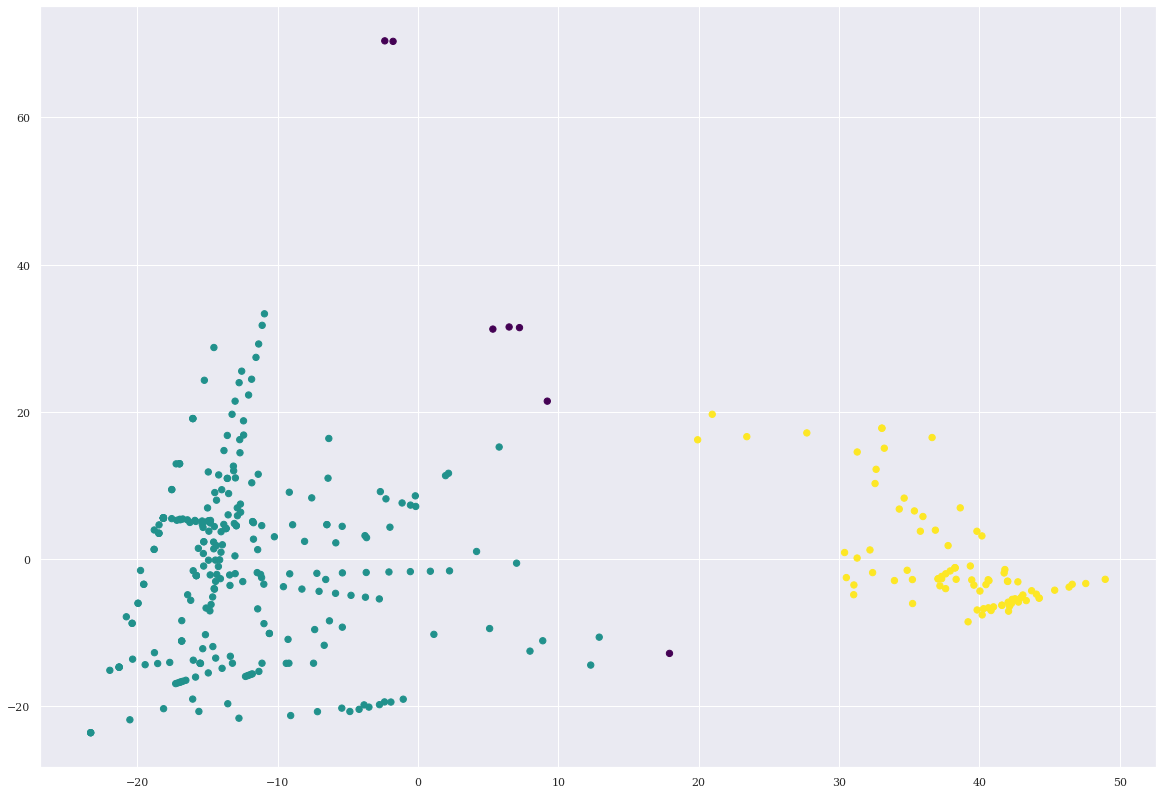

In [30]:
db_default = DBSCAN(eps = 10, min_samples = 10).fit(principalDf) 
labels = db_default.labels_ 

plt.figure(figsize=(20, 14))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, s = 40, cmap='viridis');

### t-SNE: t-distributed Stochastic Neighbor Embedding 

- On Gaussian Mixtures

Wall time: 683 ms


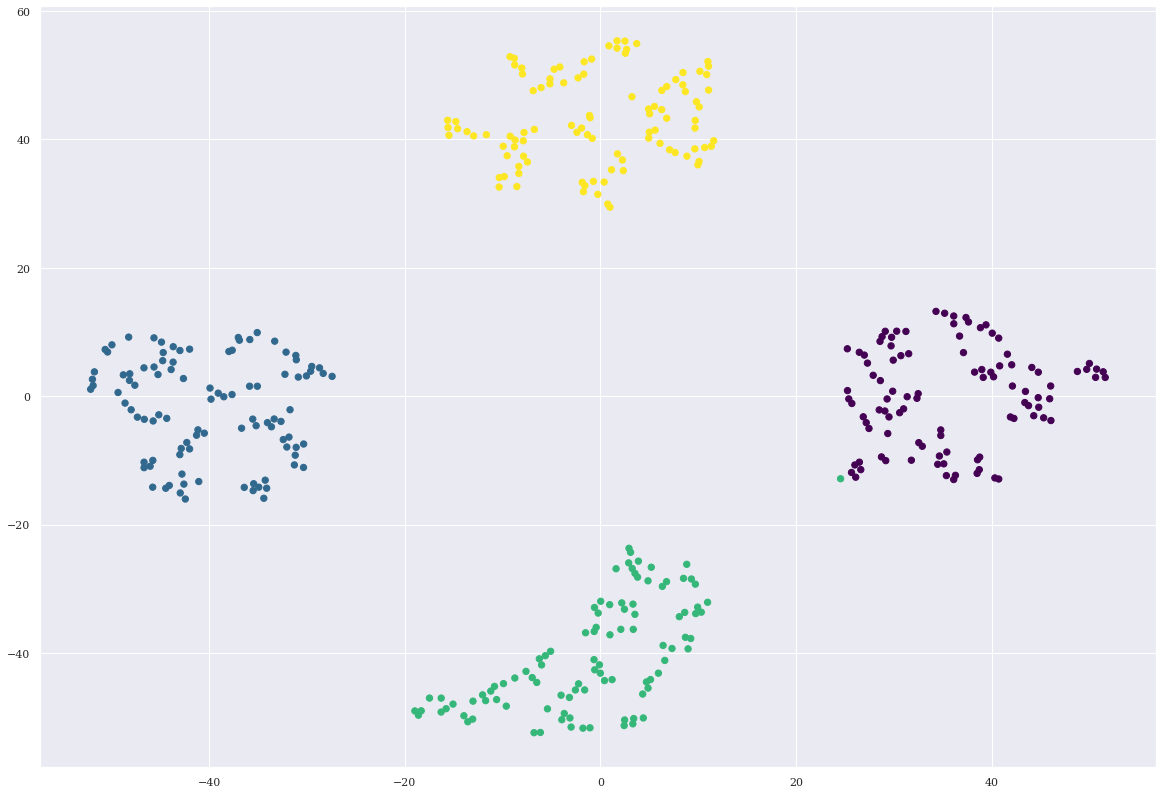

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, metric='euclidean', init='random', 
            method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y_true, s = 40, cmap='viridis');

- On Moon Shape

Wall time: 946 ms


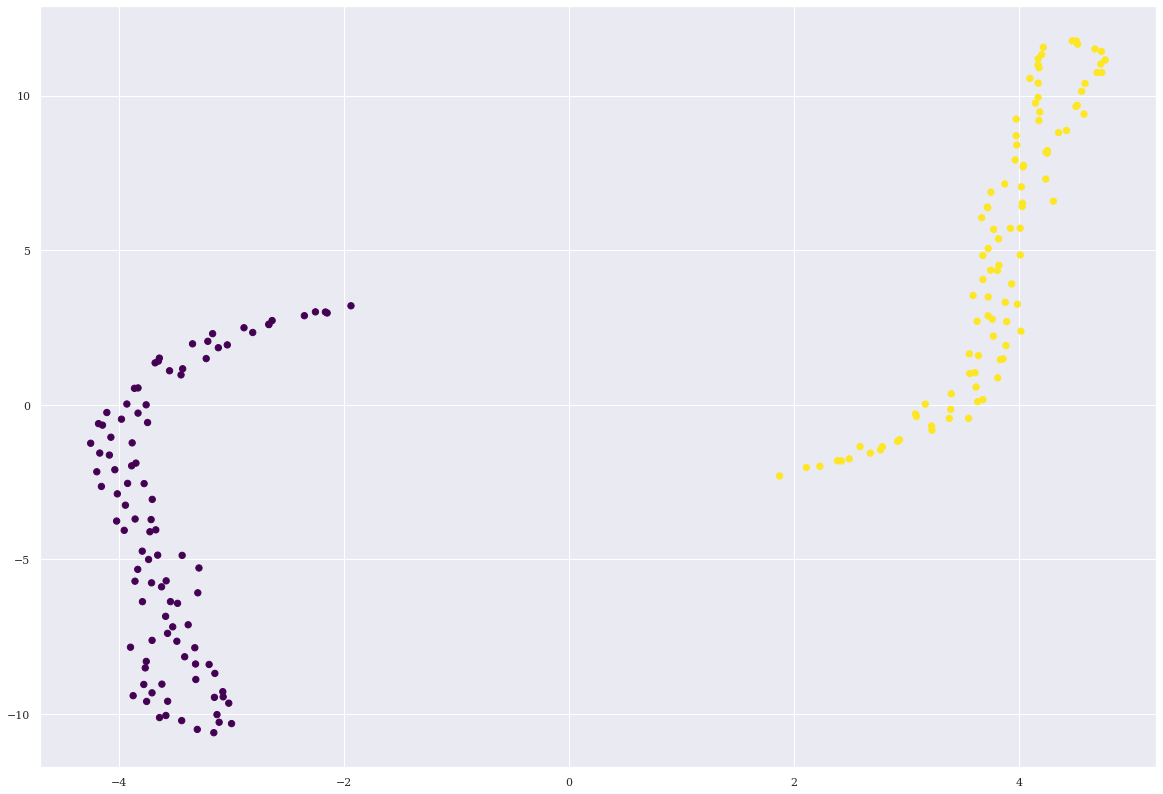

In [70]:
tsne = TSNE(n_components=2, perplexity=40.0, n_iter=1000, metric='euclidean', init='random', 
            method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(Xmoon)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = ymoon, s = 40, cmap='viridis');

- On HEA Principal Components 

Wall time: 1.93 s


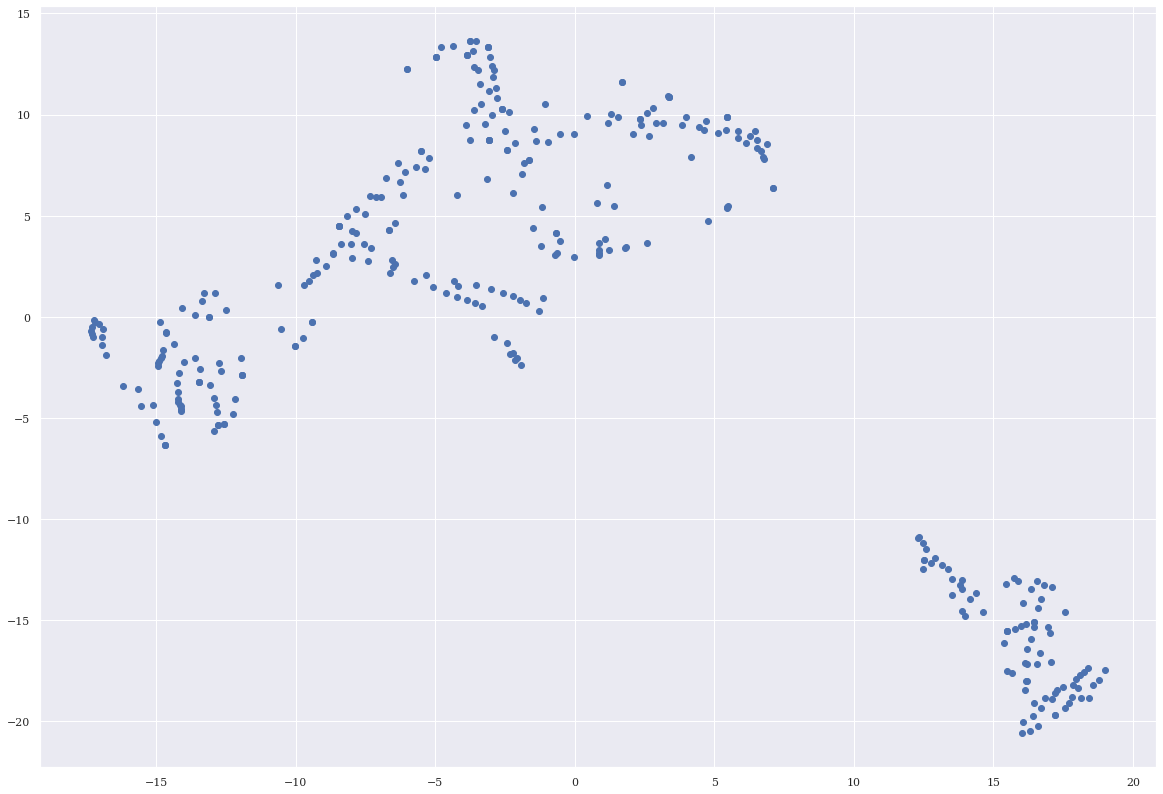

In [72]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, metric='euclidean', init='random',
    method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(principalDf)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1])

- On Entire Dataset

Wall time: 3.32 s


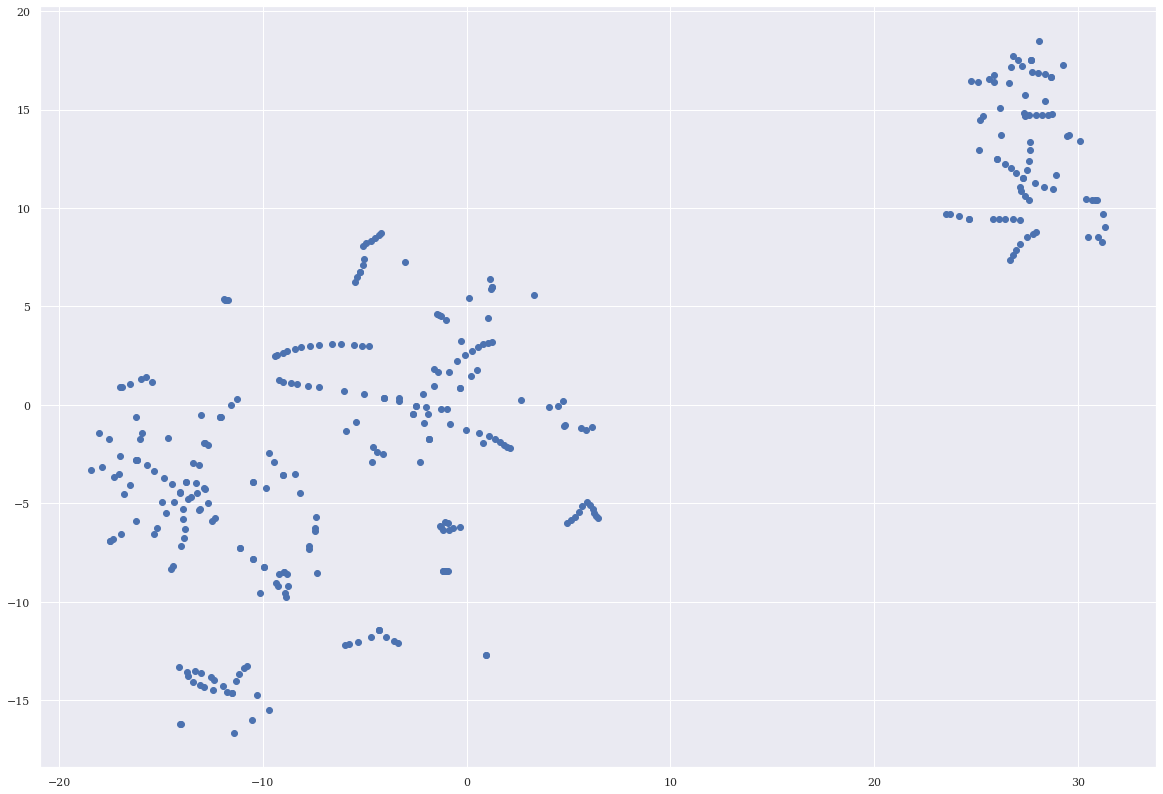

In [73]:
tsne = TSNE(n_components=2, perplexity=40,n_iter=5000,metric='euclidean',init='random',
    method='barnes_hut',n_jobs=-1)
%time X_embedded = tsne.fit_transform(subdata)

plt.figure(figsize=(20, 14))  
plt.scatter(X_embedded[:,0], X_embedded[:,1]);